If you have experienced any kinds of gambling or investment, you may know that betting size is really important factor to increase your fortune. Generally speaking, you bet more if you are confident in winning. You bet less if not. 

Someone who has studied basic statistics may think positive mean of return distribution would be good enough reason bet a lot of money. 
Is it true??

Let's consider two simple binary games. Both games are binary. The return is simply determined by win or loose. If you win, you get the same value as your betting size. If you loose, your bet is taken by a dealer. 

First game has 50.001% winning chance with 1M USD betting size while the other game has 60% winning chance with 100 bucks betting size.

Both gambles have 20 bucks as the mean of the return. Which would you want try?
Of course it depends on your risk preference. But, the first game seems to have too much risk. If you loose, you are totally fucked up.

In this article, we consider the betting strategy taking risk into consideration.

# Gamble at Casino
I have recently visited Macao and spent some times at casinos. Statistically, it have to be difficult to beat dealers at casinos. Otherwise, a lot of casinos go bankrupt. They are not doing volunteer to make you rich quickly. Running casinos is like business to take out money out of your pocket in exchange for offering you enjoyable moment.

Then, how do casinos beat you out in the games?? One of the factors would be commission. Some games take out a certain percentage of your wage as a commission. This is, however, not necessary the case for all of the games like 21.

21 is the well known game, where one mathematician, Edward O. Thorp [[wikied]](https://en.wikipedia.org/wiki/Edward_O._Thorp) established a strategy to beat dealer and got bunch of money till he was banned to get in casinos [[Thorp]](https://www.amazon.com/Beat-Dealer-Winning-Strategy-Twenty-One/dp/B01CORLBP4).
This strategy has become really famous now and most casinos has ways to counter the strategy like using multiple decks. Even in this situation, you can get slight favor winning probability if you follow the basic strategy.


Favor winning chance, however, is not enough to get you rich. One of the reasons is that you do not have infinite amount of asset to keep playing games. As I mentioned in my previous [[mypost]](https://jjakimoto.github.io/articles/finance_labeling/), if the process has low signal-to-noise ratio, you need to wait for a certain amount of steps to make sure positive returns.

For example, consider a binary game with winning probability $p$ with betting size $\mu$. We here assume that we have favor winning probability, i.e., $p > 0.5$. The cumulative return of the game is a Bernoulli process [[bernoulli]](https://en.wikipedia.org/wiki/Bernoulli_process) with steps $\mu$ and $-\mu$ with probability $p$ and $1 - p$, respectively. Each step $Z$ satisfies $E[Z] = \mu (2p - 1)$ and $Var[Z] = 4\mu^2 p (1 - p)$.

If you take a lot of steps, a Bernoulli process converges to Brownian motion[[levy]](https://www.amazon.com/Processes-Stochastic-Calculus-Cambridge-Mathematics/dp/0521738652) described by the following SDE:

$$ X_t = \mu (2p - 1) t + 2 \mu \sqrt{p(1 - p)} B_t$$

The process of described by the above equation, the mean grows linearly while the standard deviation grows proportional to square root of time. Thus, the mean grows faster and a sample process is more likely to end up positive area after a certain number of steps.

Consider the following function:
$$f(t) = \mu (2p - 1) t - 2 \mu \sqrt{p(1 - p)} \sqrt{t}$$

This function corresponds to the location of one standard deviation below the mean. To have samples within one standard deviation in positive area, $t$ has to satisfy $f(t) \geq 0$

Then, we get
$$ t \geq \frac{4 p (1 - p)}{(2p - 1)^2}$$

Let's assume a casino gives 1% favor winning change, i.e., $p = .51$
The required number of trials is approximately 2500. Opps.... that's a lot. I saw a guy playing more than one hand at the same time at a 21 table rather than doubling his bet. His behavior was reasonable considering that he increased the number of trials efficiently.

By the way, the minimum bet at 21 tables of Macao was about 50 bucks. Let's see synthetic data assuming $\mu=50$ and $p=0.51$.

required number 2498.9999999999955


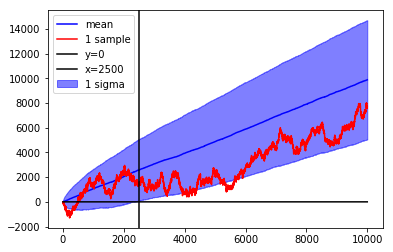

In [226]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000
T =  10000
x = np.arange(T)
mu = 50

p = .51
t_req = (4 * p*(1 - p)) / (2*p - 1)**2 
print('required number', t_req)

samples = np.random.choice([mu, -mu], size=(N, T), p=[p, (1-p)])
proc = samples.cumsum(axis=1)
proc_mean = np.mean(proc, axis=0)
proc_sig = np.std(proc, axis=0)

plt.plot(x, proc_mean, label='mean', color='b');
plt.plot(x, proc[0], label='1 sample', color='r')
plt.plot(x, 0 * x, label='y=0', color='k');
plt.axvline(x=2500, label='x=2500', color='k')
plt.fill_between(x, proc_mean + proc_sig, proc_mean - proc_sig, color='b', alpha=.5, label='1 sigma');
plt.legend(loc='upper left');
plt.savefig('casino_simulation.png')

As we predict, samples within after 2500 steps achieve positive return. 


 you should not blow off entire your asset before reaching enough number of  trials. 

One more other thing you need to consider is to avoid blowing off all of your money. Consider an extremum point $t^*$ of $f$, which satisfies
                                                                       $$\frac{\partial}{\partial t} f (t^*) = 0$$

A few step calculation leads to 
$$ t^* = \frac{p (1 - p)}{(2p - 1)^2}$$

Then, we get
$$f(t^*) = -\mu \frac{p (1 - p)}{(2p - 1)}$$

In order to survive up to one standard deviation downside, $\mu \frac{p (1 - p)}{(2p - 1)}$ would suffice.

required cash 624.7499999999994


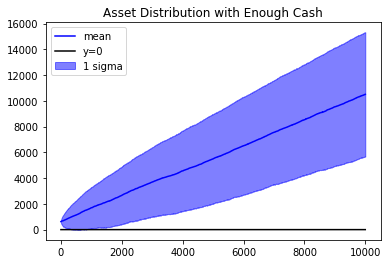

In [230]:
cash = mu * p * (1 - p) / (2 * p - 1)
proc = samples.cumsum(axis=1) + cash
proc_mean = np.mean(proc, axis=0)
proc_sig = np.std(proc, axis=0)

print('required cash', cash)

plt.title('Asset Distribution with Enough Cash')
plt.plot(x, proc_mean, label='mean', color='b');
plt.plot(x, 0 * x, label='y=0', color='k');
plt.fill_between(x, proc_mean + proc_sig, proc_mean - proc_sig, color='b', alpha=.5, label='1 sigma');
plt.legend(loc='upper left');
plt.savefig('synthetic.png')

Approximately, you need 625 bucks to survive. Actually, this number is negatively biased. When computing statistics, we also consider the process which sinks below 0 once. In the gamble, players are unable to keep playing games after loosing all of their money. So, I can say this number is sort of lower bound. 

# Investment in Financial Market

For the sake of simplicity, we considered the case of fixed size betting. The return size is irrelevant to your asset size.

In financial investment, returns are described by percentage. How much you would get or lose is proportional to your investment size. Thus, the asset size is described by  multiplicative process rather than additive process.

This makes difference how the process grows.
Let's consider a synthetic example generated by Black Scholes Model.
The price movement is described as the following SDE:
$$dX_t = X_t(\mu dt + \sigma dB_t)$$
where $B_t$ is a standard Brownian motion; $\mu$ and $\sigma$ are constant variables.

To execute numerical simulations, we discretize this equation to 
$$X_n = X_0 \prod_{j=1}^n (1 + \mu \Delta t+ \sigma B_{\Delta t})$$

Note that this model is not exactly correct. If you set high volatility, some multiplicative factors may end up negative number.
Since usual stock price is positive value, we modify the model by taking only positive as following:
$$X_n = X_0 \prod_{j=1}^n (1 + \mu \Delta t+ \sigma B_{\Delta t})^+$$

We consider non-volatile and volatile processes sharing the same positive mean parameter.

The non-volatile process is defined by $\mu=0.1$ and $\sigma=0.1$ while  the volatile one id defined by $\mu=0.1$ and $\sigma=1.0$.
For both processes, we use a fixed time interval $\Delta t = 0.01$.

In [218]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


mu = .1
sigma = .1
T = 10000
ts = np.arange(T + 1) * dt
N = 1000
dt = 0.01
bs = np.random.randn(T, N)
x0 = 100
growth = 1 + dt * mu + np.sqrt(dt) * sigma * bs
growth = np.concatenate((np.ones((1, N)), growth))
growth = np.clip(growth, a_min=0, a_max=None)
x = np.cumprod(growth, axis=0)

plt.plot(ts, x[:, 0]);
plt.title('One Sample Path from the Volatile Process')
plt.savefig('volatile_sample.png')
plt.close()

plt.plot(ts, np.mean(x, axis=1));
plt.title('Mean from the Volatile Process')
plt.savefig('volatile_mean.png')
plt.close()

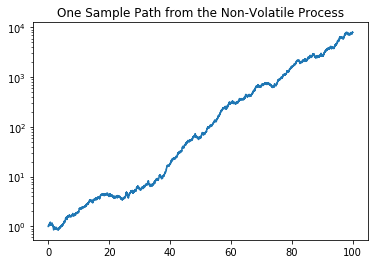

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ts, x[:, 0]);
plt.title('One Sample Path from the Non-Volatile Process')
plt.yscale('log')
plt.savefig('nonvolatile_sample.png')

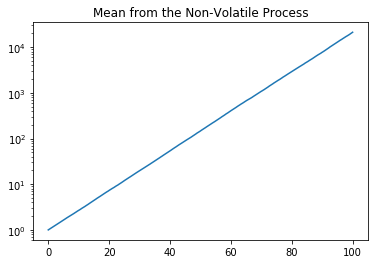

In [220]:
proc_mean = np.mean(x, axis=1)
proc_sig = np.std(x, axis=1)
plt.plot(ts, proc_mean);
plt.title('Mean from the Non-Volatile Process')
plt.yscale('log')
plt.savefig('nonvolatile_mean.png')

In [208]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


mu = .1
sigma = 1.
T = 10000
ts = np.arange(T + 1) * dt
N = 1000
dt = 0.01
bs = np.random.randn(T, N)
x0 = 100
growth = 1 + dt * mu + np.sqrt(dt) * sigma * bs
growth = np.concatenate((np.ones((1, N)), growth))
growth = np.clip(growth, a_min=0, a_max=None)
x = np.cumprod(growth, axis=0)

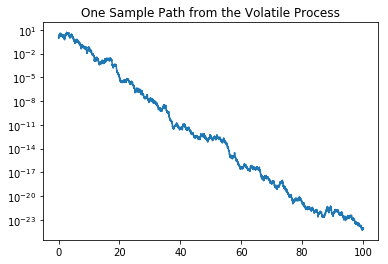

In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ts, x[:, 0]);
plt.title('One Sample Path from the Volatile Process')
plt.yscale('log')
plt.savefig('volatile_sample.png')

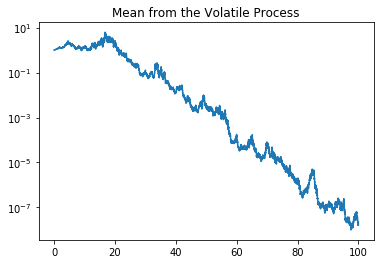

In [217]:
proc_mean = np.mean(x, axis=1)
proc_sig = np.std(x, axis=1)
plt.plot(ts, proc_mean);
plt.title('Mean from the Volatile Process')
plt.yscale('log')
plt.savefig('volatile_mean.png')

While both process has the same positive mean, the process with high volatility seems to have difficulty to grow. Even if you are able to access to sample mean of the price distribution and confirm the positive mean, it is not sufficient to expect positive return. 

This phenomena is explained by the paper published by O. Peters, and M. Gell-Mann (Physics Nobel Laurent) [[gellmann]](https://arxiv.org/pdf/1405.0585.pdf). This is also explained concisely in a blog post by E. Chan [[chan]](http://epchan.blogspot.com/2018/06/loss-aversion-is-not-behavioral-bias.html). When you consider the growth of the process using sample mean, you have to transform the process into the one with ergodicity. In above example, the process generated by Black Scholes does not hold ergodicity. Therefore, positive ensamble mean does not grantee the positive growth. For multiplicative process, taking mean of log return might be more appropriate. Especially, log return of Black Scholes Model holds ergodicity.

Using Ito's rule, we can deduce 
$$X_t = X_0 exp[(\mu - \frac{1}{2} \sigma^2) t + \sigma B_t]$$

Thus, mean of log return grows with linear coefficient $(\mu - \frac{1}{2} \sigma^2)$. For our cases, the coefficient of the first process is 0.995 while that of latter is -0.4. This implies that the latter process shrinks as time goes. 

# Betting Size

Now we come to talking about betting size. In the previous section, we look at how important to look at risk. Just considering mean is not good enough to win games.